# Gradient Descent Implementation
- This note includes implementation of gradient descent method using Python 3 __without an assist of TensorFlow or Keras__.
- Numpy python module is only tool for matrix calculation.
- Simple Regression Model

## Import Libraries/Packages

In [2]:
import numpy as np
import math

import matplotlib.pyplot as plt

## Prepare Polynomial Data

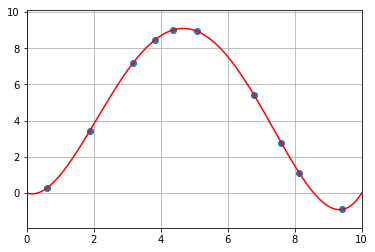

In [61]:
polydegree = 4
poly_roots = np.append(np.random.random(polydegree-2)*9, [0,10])
poly_coef = np.poly(poly_roots)

x_ax = np.linspace(0,10,1000)
poly_line = np.polyval(poly_coef,x_ax)
modifier = 10 / (max(poly_line)-min(poly_line))

poly_coef *= modifier # rescale y-axis to fit in 10
poly_line = np.polyval(poly_coef,x_ax)

# Generate set of points as a dataset
num_data = 10 # number of data
x_val, gap = np.linspace(0,10, num=num_data+1, endpoint=False, retstep=True)
x_val = x_val[1:] + gap * (np.random.random(num_data) - 0.5 ) # add jitter
y_val = np.polyval(poly_coef, x_val)

# Visualize
fig = plt.figure()
subplot = fig.add_subplot(1,1,1)
subplot.set_xlim(0,10)
subplot.set_ylim(min(poly_line)-1, max(poly_line)+1)
subplot.grid('on')
subplot.scatter(x_val, y_val)
subplot.plot(x_ax, poly_line, 'r')

## Polynomial Regression Model

- The vector w act as a regression model.
- Goal is move $w_0$, which is zero vector, to approach the coefficient of polynomial.

$$
y_n = (n^0, n^1, n^2, n^3, n^4)\cdot
\begin{pmatrix}
w_0 \\ w_1 \\ w_2 \\ w_3 \\ w_4
\end{pmatrix}
= \sum_{m=0}^{4}w_mn^m \\
\textbf{y} = \textbf{Xw} \\
\textbf{X} =
\begin{pmatrix}
x_0^0 & x_0^1 & x_0^2 & x_0^3 & x_0^4 \\
x_1^0 & x_1^1 & x_1^2 & x_1^3 & x_1^4 \\
x_2^0 & x_2^1 & x_2^2 & x_2^3 & x_2^4 \\
\vdots\\ 
x_n^0 & x_n^1 & x_n^2 & x_n^3 & x_n^4 \\
\end{pmatrix}
, \quad
\textbf{w} =
\begin{pmatrix}
w_0 \\ w_1 \\ w_2 \\ w_3 \\ w_4
\end{pmatrix}
$$

In [155]:
train_x = np.zeros([num_data,polydegree+1])
train_t = y_val.reshape(num_data, 1)

for row, x_data in enumerate(x_val):
    for col in range(0,polydegree+1): # Total 4 unknown variable
        train_x[row][col] = x_data**col

## Gradient Descent Method
- Loss Function:
$$
E = \frac{1}{2} \sum_{n=1}^{12}(y_n - t_n)^2 \\
E(\textbf{w}) = \frac{1}{2} \sum_{n=1}^{12}\left(\sum_{m=0}^{4}w_mn^m - t_n\right)^2 
$$
One of the key criteria of local minimum of function is the gradient $\frac{\partial E}{\partial w_m} = 0$.  
The gradient of function represent the direction where the maximum slope along the surface is.  
Gradient descent method suggest the discrete approach to local minima by moving in the opposite gradient direction from any point along the surface.  
$$
\textbf{w}^{\text{new}}=\textbf{w}-\epsilon\nabla E
$$
- $\epsilon$ represent the rate of learning

In [334]:
w = np.zeros([polydegree+1, 1])

In [339]:
for train_cycle in range(10000): # 10 cycle
    #print('w: ', w.T)
    y = np.matmul(train_x, w).reshape(num_data,1)
    epsilon = y - train_t
    delE = np.matmul(train_x.T, epsilon) # gradient
    alpha = np.geomspace(0.001, 0.000000001, polydegree+1).reshape(5,1) # learning rate
    w -= np.multiply(alpha,delE)# update weight
    error = np.matmul(epsilon.T, epsilon)[0][0] # error at this moment

[ 0.0214427  -0.4049428   1.96216578 -0.57007982  0.        ]
[ 0.00372526 -0.06824654 -0.04180495  3.25828527 -1.08786744]


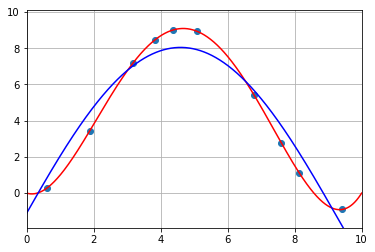

In [340]:
predict_line = np.polyval(w.T[0][::-1],x_ax)
print(poly_coef)
print(w.T[0][::-1])
# Visualize
fig = plt.figure()
subplot = fig.add_subplot(1,1,1)
subplot.set_xlim(0,10)
subplot.set_ylim(min(poly_line)-1, max(poly_line)+1)
subplot.grid('on')
subplot.scatter(x_val, y_val)
subplot.plot(x_ax, poly_line, 'r')
subplot.plot(x_ax, predict_line, 'b')

### Graphing Progress